#Resizing images

In [ ]:
import os 
from google.colab import drive
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
import glob
import matplotlib.pylab as plt

In [ ]:
from google.colab import drive

In [ ]:
#mount drive
mount_point = '/content/gdrive'
drive.mount(mount_point)

Mounted at /content/gdrive


In [ ]:
#importing images from folder
from PIL import Image
import os, os.path

imgs = []
path = "/content/gdrive/MyDrive/Generative_project/images from mapillary/images_olga"

for f in os.listdir(path):
    imgs.append(Image.open(os.path.join(path,f)))

len(imgs)

569

In [ ]:
imgs[4].size

(2048, 1536)

In [ ]:
imgs[10].size

(2048, 1024)

In [ ]:
#creating equal sized images
left = 0
top = 0
right = 1500
bottom = 1500
 
img_res =[]

for image in imgs[:1000]:
  if image.size>=(1500,1500):
    img_new = image.crop((left, top, right, bottom)) 
    img_res.append(img_new)
 
img_res[5]

In [ ]:
len(img_res)

542

In [ ]:
#creating images with the needed shape 256,256

img_real = []

for image in img_res:
  img = image.resize((256,256))
  img_real.append(img)

#img_real[4]

#Edge tries

## with PIllow

In [ ]:
from PIL import Image, ImageFilter,ImageOps

In [ ]:
# Converting the image to grayscale, as edge detection 
# requires input image to be of mode = Grayscale (L)

edges=[]
for image in img_real:
  image = image.convert("L")
# Detecting Edges on the Image using the argument ImageFilter.FIND_EDGES
  image = image.filter(ImageFilter.FIND_EDGES)
  im_invert = ImageOps.invert(image)
  edges.append(im_invert)

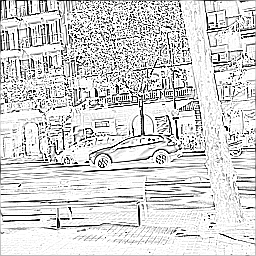

In [ ]:
edges[100]

## with openCV

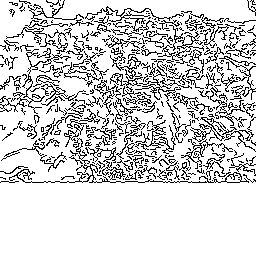

In [ ]:
import numpy as np
import cv2 as cv
img_sketch_cv=[]
for image in img_real:
  open_cv_image = np.array(image) 
# Convert RGB to BGR 
  open_cv_image = open_cv_image[:, :, ::-1].copy()

  edges = cv.Canny(open_cv_image,100,200)

  sketch = (255-edges)
  img_sketch_cv.append(sketch)
cv2_imshow(img_sketch_cv[4])

In [ ]:
#converting images from PIL to opencv format
img_real_cv=[]

for i in range(len(img_real)):
  open_cv_image = np.array(img_real[i]) 
# Convert RGB to BGR 
  open_cv_image = open_cv_image[:, :, ::-1].copy()
  img_real_cv.append(open_cv_image)


In [ ]:
#converting images from PIL to opencv format
img_sketch_cv=[]

for i in range(len(img_real)):
  open_cv_image = np.array(edges[i]) 
# Convert RGB to BGR 
  open_cv_image = open_cv_image[:, :].copy()
  img_sketch_cv.append(open_cv_image)


In [ ]:
%%script echo skipping
for i in img_real_cv:
  cv2_imshow(i)

#generating sketch image

img_real_cv - name of list containing the pictures

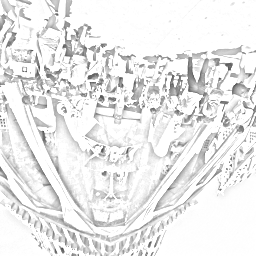

In [ ]:
img_sketch_cv=[]

for img in img_real_cv:
  # convert an image from one color space to another
  grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  invert = cv2.bitwise_not(grey_img)  # helps in masking of the image
  # sharp edges in images are smoothed while minimizing too much blurring
  blur = cv2.GaussianBlur(invert, (21, 21), 0)
  invertedblur = cv2.bitwise_not(blur)
  sketch = cv2.divide(grey_img, invertedblur, scale=256.0)
  img_sketch_cv.append(sketch)

cv2_imshow(img_sketch_cv[2])
#cv2.imwrite("sketch.png", sketch)  # converted image is saved as mentioned name

In [ ]:
img_sketch_cv[2].shape

(256, 256)

In [ ]:
img_real_cv[1].shape

(256, 256, 3)

#joining image and sketch in one file

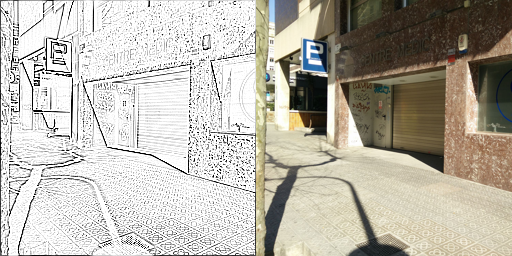

In [ ]:
final_image = []

for i in range(len(img_sketch_cv)):
  img1 = img_sketch_cv[i]
  img2 = img_real_cv[i]


  img11 = np.zeros( ( np.array(img1).shape[0], np.array(img1).shape[1], 3 ) )
  img11[:,:,0] = img1 # same value in each channel
  img11[:,:,1] = img1
  img11[:,:,2] = img1


  #create empty matrix
  vis = np.zeros((256, 512,3), np.uint8)

  #combine 2 images
  vis[:256, :256,:3] = img11
  vis[:256, 256:512,:3] = img2

  final_image.append(vis)


cv2_imshow(final_image[10])

In [ ]:
cv2_imshow(final_image[10])

In [ ]:
for i in range(len(final_image)):

  cv2.imwrite('/content/gdrive/MyDrive/Generative_project/generated dataset/edges from Pillow/'+str(2000+i)+'.png',final_image[i])

#OLD

https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python

In [ ]:
%%script echo skipping

img = cv.imread(imgp)

import tensorflow as tf
offset_height=0
offset_width=0
target_height=256
target_width=256
x = tf.image.crop_to_bounding_box(
    img, offset_height, offset_width, target_height, target_width
)
tf.keras.preprocessing.image.array_to_img(
    x, data_format=None, scale=True, dtype=None
)

skipping


https://learnopencv.com/cropping-an-image-using-opencv/

In [ ]:
print(img.shape) # Print image shape
cv2_imshow(img)

# Cropping an image
cropped_image = img[0:256, 0:256]

# Display cropped image
cv2_imshow(cropped_image)

# Save the cropped image
cv2.imwrite("Cropped Image.png", cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cropped_image.shape

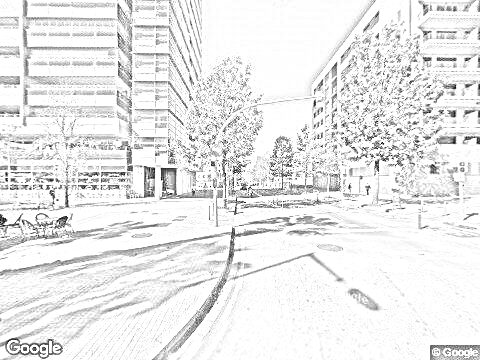

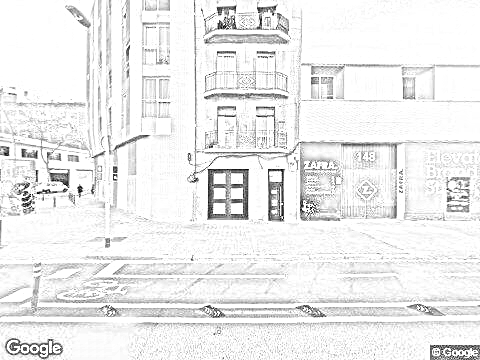

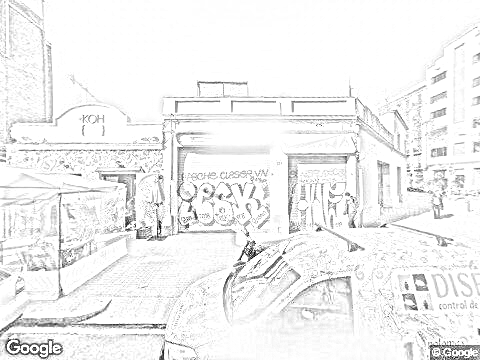

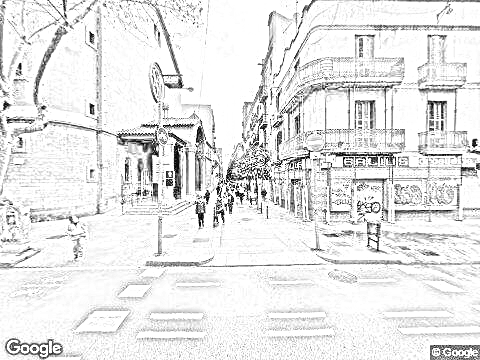

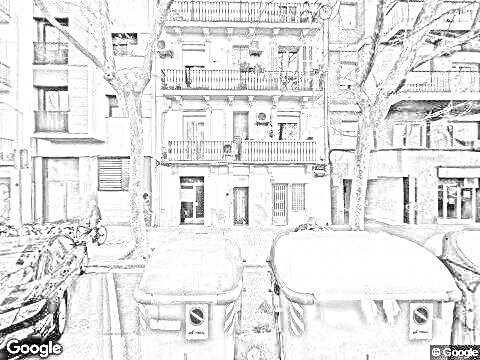

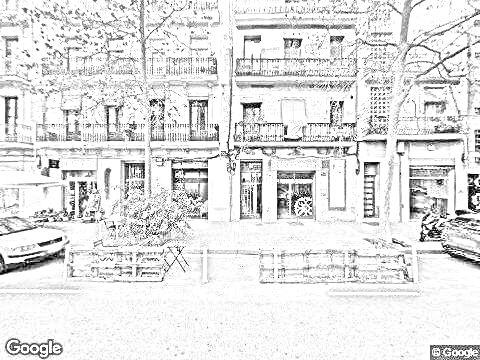

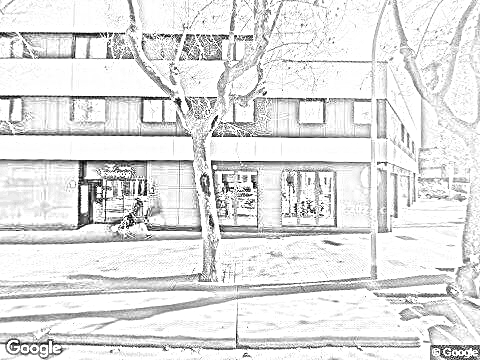

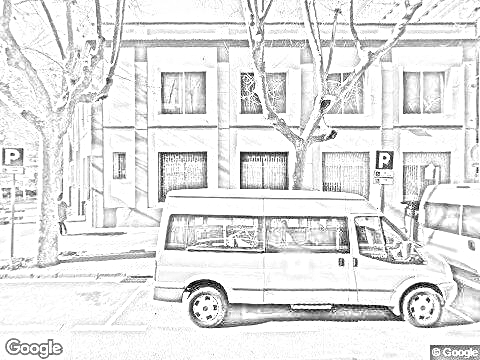

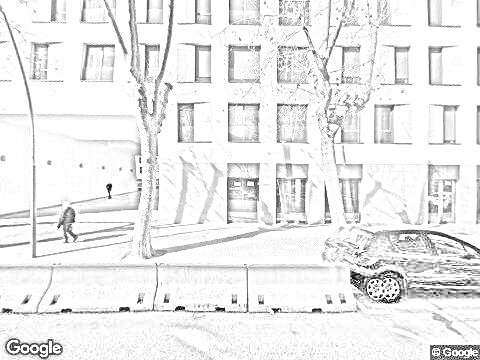

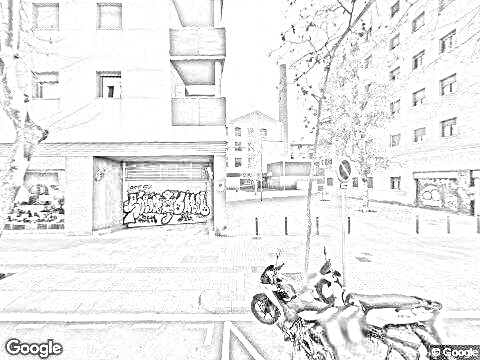

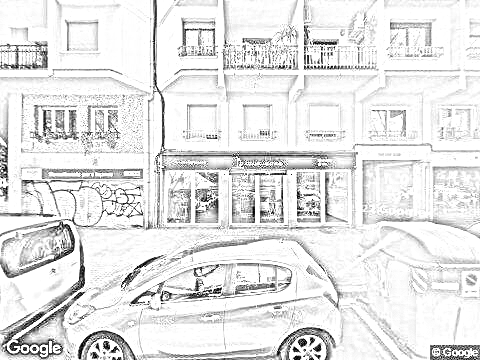

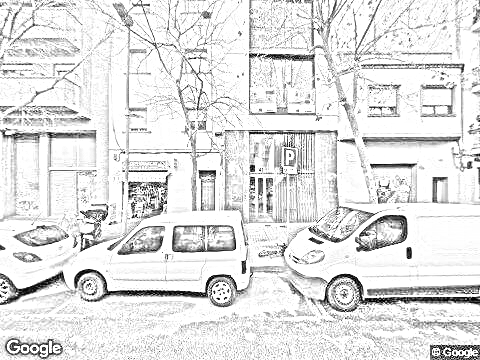

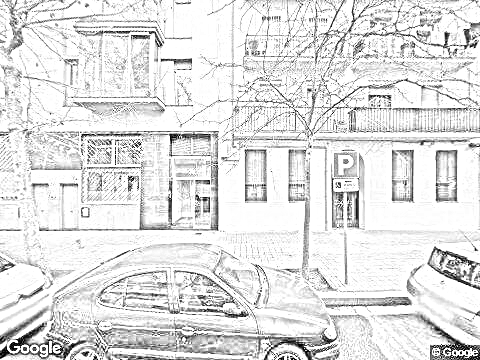

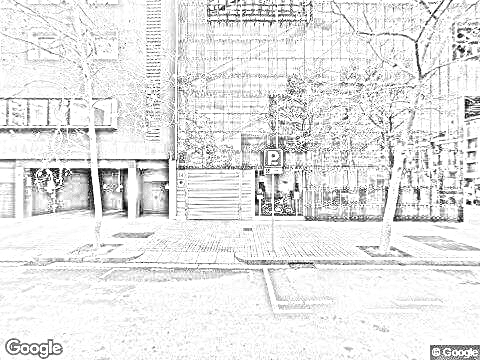

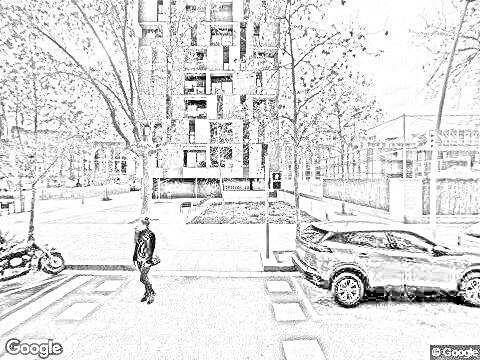

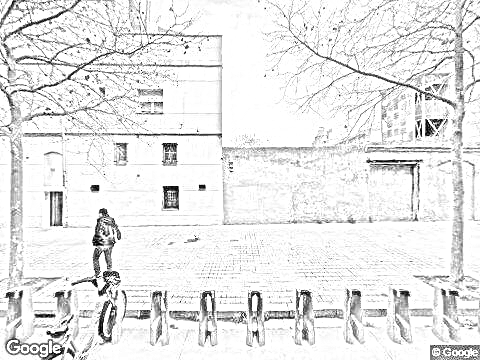

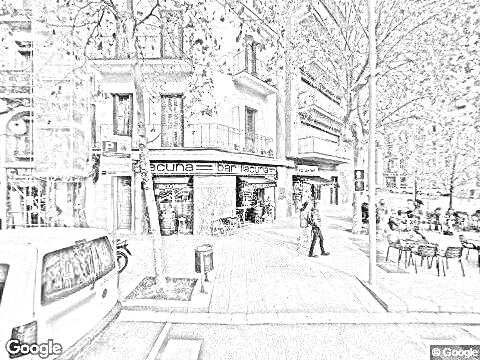

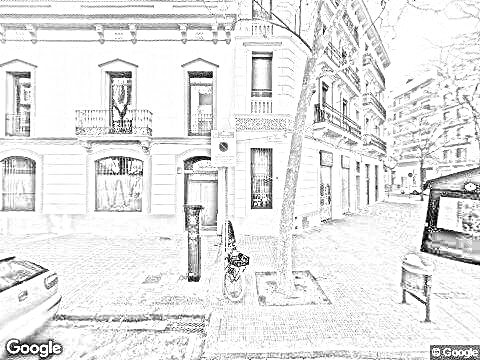

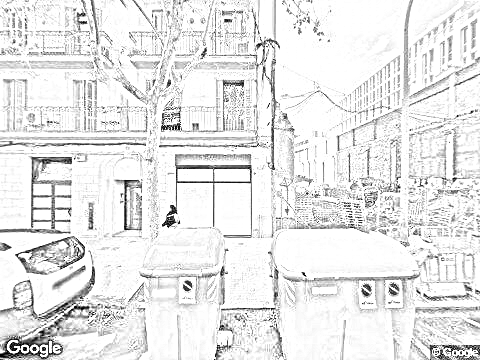

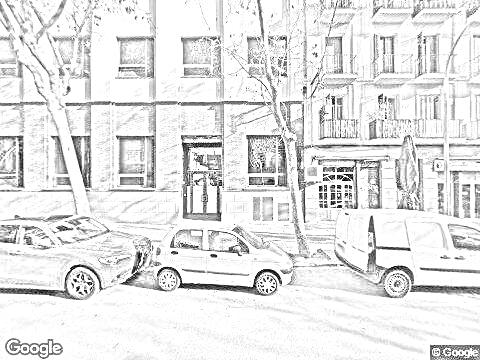

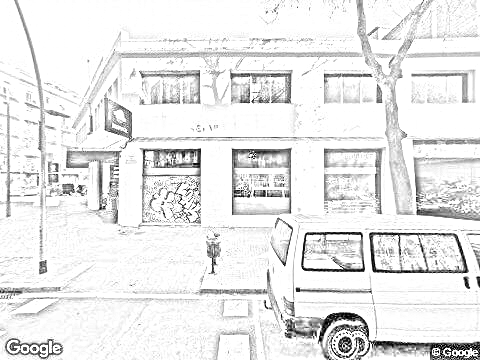

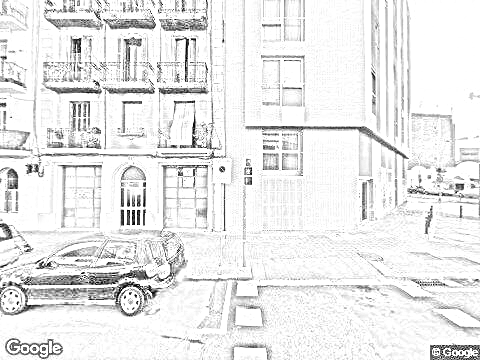

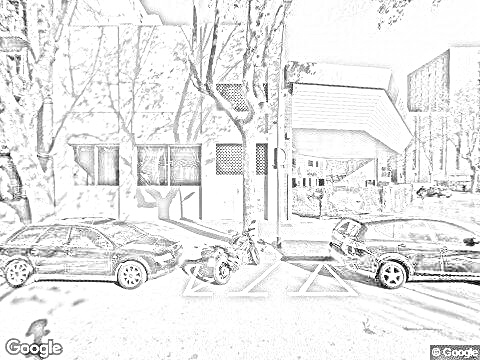

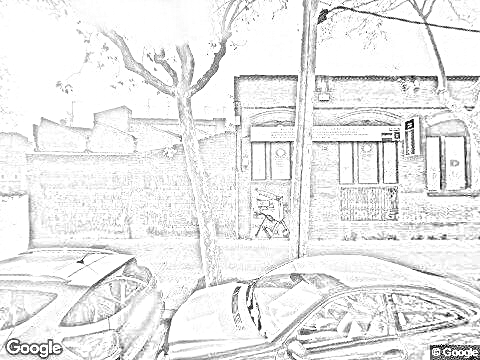

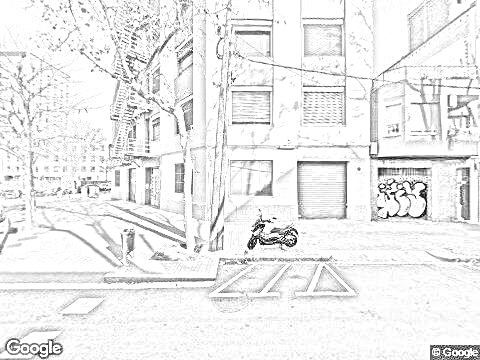

In [ ]:
for file in glob.glob(path):
  img = cv.imread(file)
  grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  invert = cv2.bitwise_not(grey_img)  # helps in masking of the image
  # sharp edges in images are smoothed while minimizing too much blurring
  blur = cv2.GaussianBlur(invert, (21, 21), 0)
  invertedblur = cv2.bitwise_not(blur)
  sketch = cv2.divide(grey_img, invertedblur, scale=256.0)

  cv2_imshow(sketch)

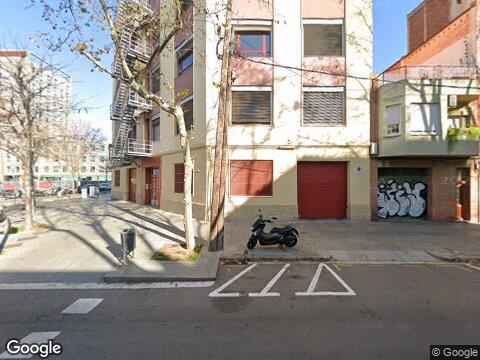

In [ ]:
path ='/content/drive/MyDrive/Colab Notebooks/Bootcamp 03/images-20220407T135813Z-001/images/41.39798856602,2.2008157987230477_0.png' 
img = cv.imread(path)
cv2_imshow(img)